In [1]:
#----------------------------------------------------------------------------------------------------------------------------------

# Classification of credit card transactions as either "approved" or "fraudulent".
# Data wrangling and application of supervised learning techniques to find the best model and parameters.
# The target variable is the last column of the DataFrame: "+" -> approved // "-" -> fraudulent.

#----------------------------------------------------------------------------------------------------------------------------------

In [2]:
# import of all required libaries & data; first inspection

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("cc_approvals.data")

In [5]:
print(data.info(),"\n")
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   b       689 non-null    object 
 1   30.83   689 non-null    object 
 2   0.0     689 non-null    float64
 3   u       689 non-null    object 
 4   g       689 non-null    object 
 5   w       689 non-null    object 
 6   v       689 non-null    object 
 7   1.25    689 non-null    float64
 8   t       689 non-null    object 
 9   t.1     689 non-null    object 
 10  1       689 non-null    int64  
 11  g.1     689 non-null    object 
 12  0       689 non-null    int64  
 13  +       689 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 75.5+ KB
None 



,b,30.83,0.0,u,g,w,v,1.25,t,t.1,1,g.1,0,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,g,0,+


In [6]:
# HEADERS: for more clarity headers get renamed

In [7]:
header_list=["f"+str(i) for i in range(1,data.shape[1])]
header_list.append("target")
data.columns=header_list
data.sample()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,target
201,b,24.83,2.75,u,g,c,v,2.25,t,t,6,g,600,+


In [8]:
# DATA TYPES

In [9]:
#double check data types
count=0
for c in data.columns:
    prop=data[c].apply(type).unique()
    print(c,prop)
    if len(prop)>1:
        print(f"{c} is compromised")
        count+=1
    else:
        continue
if count==0:
    print("\n=> Data types across all features are consistent.")

f1 [<class 'str'>]
f2 [<class 'str'>]
f3 [<class 'float'>]
f4 [<class 'str'>]
f5 [<class 'str'>]
f6 [<class 'str'>]
f7 [<class 'str'>]
f8 [<class 'float'>]
f9 [<class 'str'>]
f10 [<class 'str'>]
f11 [<class 'int'>]
f12 [<class 'str'>]
f13 [<class 'int'>]
target [<class 'str'>]

=> Data types across all features are consistent.


In [10]:
# converting "f2" into floats and identifying non-number characters
ident_mask=pd.to_numeric(data["f2"],errors="coerce").isna()
data.loc[ident_mask,"f2"].unique()

array(['?'], dtype=object)

In [11]:
# since strings only contain "?" -> conversion to NaNs -> NaNs get imputed by the mean value in the ML preprocessing step
data["f2"]=pd.to_numeric(data["f2"],errors="coerce")
data["f2"].dtypes

dtype('float64')

In [12]:
data[data["f2"].isna()]

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,target
82,a,NaN,3.500,u,g,d,v,3.000,t,f,0,g,0,-
85,b,NaN,0.375,u,g,d,v,0.875,t,f,0,s,0,-
91,b,NaN,5.000,y,p,aa,v,8.500,t,f,0,g,0,-
96,b,NaN,0.500,u,g,c,bb,0.835,t,f,0,s,0,-
253,b,NaN,0.625,u,g,k,v,0.250,f,f,0,g,2010,-
285,a,NaN,1.500,u,g,ff,ff,0.000,f,t,2,g,105,-
328,b,NaN,4.000,y,p,i,v,0.085,f,f,0,g,0,-
444,a,NaN,11.250,u,g,ff,ff,0.000,f,f,0,g,5200,-
449,b,NaN,3.000,y,p,i,bb,7.000,f,f,0,g,1,-
499,b,NaN,4.000,u,g,x,v,5.000,t,t,3,g,2279,+


In [13]:
# DATA CONSISTENCY

In [14]:
# determine number of total NaNs -> NaNs get imputed by the mean value in the ML preprocessing step
data.isna().sum()

f1         0
f2        12
f3         0
f4         0
f5         0
f6         0
f7         0
f8         0
f9         0
f10        0
f11        0
f12        0
f13        0
target     0
dtype: int64

In [15]:
# split data for convenient handling
num_dat=data.select_dtypes("number")
str_dat=data.select_dtypes("object")

In [16]:
# determine unique categorical values
for c in str_dat.columns:
    print(c,data[c].unique())

f1 ['a' 'b' '?']
f4 ['u' 'y' '?' 'l']
f5 ['g' 'p' '?' 'gg']
f6 ['q' 'w' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' '?']
f7 ['h' 'v' 'bb' 'ff' 'j' 'z' '?' 'o' 'dd' 'n']
f9 ['t' 'f']
f10 ['t' 'f']
f12 ['g' 's' 'p']
target ['+' '-']


In [17]:
# each fraction of "?" (in %) in each feature
count_f=(data=="?").sum()/len(data)*100
count_f

f1        1.741655
f2        0.000000
f3        0.000000
f4        0.870827
f5        0.870827
f6        1.306241
f7        1.306241
f8        0.000000
f9        0.000000
f10       0.000000
f11       0.000000
f12       0.000000
f13       0.000000
target    0.000000
dtype: float64

In [18]:
# identifying rows with ("?" > 1) and determing fraction (in %)
count_r=(data=="?").sum(axis=1)
(count_r[count_r>1])/data.shape[1]*100

205    28.571429
269    28.571429
329    28.571429
455    28.571429
478    21.428571
538    14.285714
591    28.571429
600    21.428571
621    28.571429
dtype: float64

In [19]:
# small overall fraction of "?" -> those will be transformed to NaN \ 
# and imputed by the most frequent value in the ML preprocessind step rather than left as standalone value
data.replace("?",np.nan)
data.isna().sum()

f1         0
f2        12
f3         0
f4         0
f5         0
f6         0
f7         0
f8         0
f9         0
f10        0
f11        0
f12        0
f13        0
target     0
dtype: int64

In [20]:
# for Python practicing purposes, identification of rows with ("?">1) in an algorithmic approach:

# 1.) identify rows with "?" and determine row index to create sub dataframe
ind_list=[]
for c in str_dat.columns:
    ind_list=ind_list+list(data[data[c]=="?"].index)
ind_list=list(set(ind_list))
sub_df=data.iloc[ind_list].reset_index()

In [21]:
# 2.) check each cell, count the "?" row-wise and store values in a lookup dictionary
count_dic={}
for r in sub_df.index:
    count=0
    for c in sub_df.columns:
        if sub_df.loc[r,c]=="?":
            count=count+1
        else:
            continue
        count_dic[r]=count
print(count_dic)

{0: 1, 1: 1, 2: 4, 3: 2, 4: 1, 5: 1, 6: 1, 7: 4, 8: 4, 9: 4, 10: 4, 11: 1, 12: 3, 13: 1, 14: 3, 15: 1, 16: 4, 17: 1, 18: 1}


In [22]:
# 3.) identify values >1 and match corresponding key with sub dataframe in order to unlock original index
key_list=[]
for k,v in count_dic.items():
    if v>1:
        key_list.append(k)
    else:
        continue
sub_sub_df=sub_df.loc[key_list]
sorted(list(sub_sub_df.set_index("index").index))

[205, 269, 329, 455, 478, 538, 591, 600, 621]

In [23]:
# for further practical puroposes, assume that two-letter alphabetic strings are typos (which are probably not); therefore, correcting those, too

In [24]:
import re
for c in str_dat.columns:
    data[c]=data[c].apply(lambda x: re.sub(r"^[a-z]{2}$",x[0],x))
    print(c,data[c].unique())

f1 ['a' 'b' '?']
f4 ['u' 'y' '?' 'l']
f5 ['g' 'p' '?']
f6 ['q' 'w' 'm' 'r' 'c' 'k' 'd' 'x' 'i' 'e' 'a' 'f' 'j' '?']
f7 ['h' 'v' 'b' 'f' 'j' 'z' '?' 'o' 'd' 'n']
f9 ['t' 'f']
f10 ['t' 'f']
f12 ['g' 's' 'p']
target ['+' '-']


In [25]:
# checking stats on numeric data

In [26]:
data.describe()

,f2,f3,f8,f11,f13
count,677.000000,689.000000,689.000000,689.000000,689.000000
mean,31.569261,4.765631,2.224819,2.402032,1018.862119
std,11.966670,4.978470,3.348739,4.866180,5213.743149
min,13.750000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.000000,0.165000,0.000000,0.000000
50%,28.420000,2.750000,1.000000,0.000000,5.000000
75%,38.250000,7.250000,2.625000,3.000000,396.000000
max,80.250000,28.000000,28.500000,67.000000,100000.000000


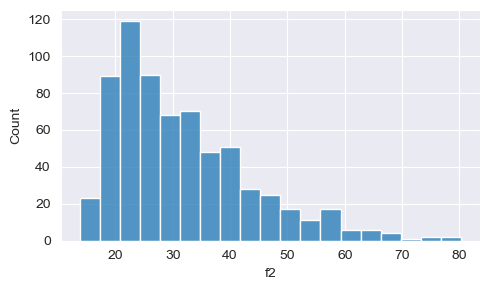

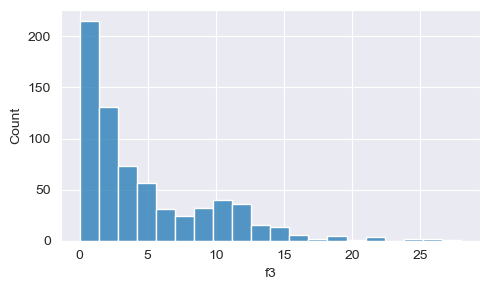

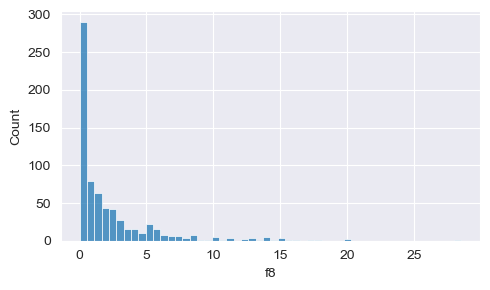

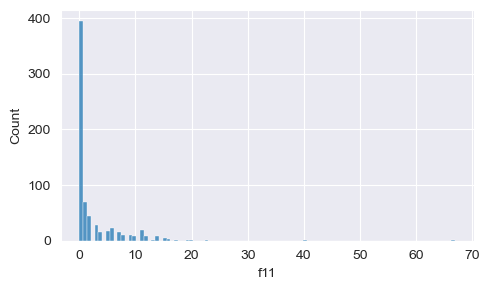

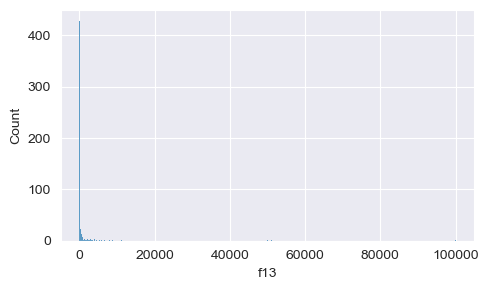

In [27]:
# determine distribution in order to define potential ML processing steps
sns.set_style("darkgrid")
for c in num_dat.columns:
    fig,ax=plt.subplots(figsize=(5,3))
    sns.histplot(data=data,x=c,ax=ax)
    plt.tight_layout()
    plt.show()

<Axes: >

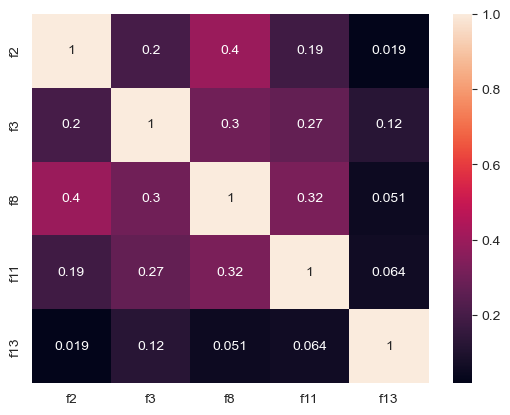

In [28]:
# check visually for correlation among numeric data
sns.heatmap(num_dat.corr(),annot=True)

In [29]:
# check if a coefficent above 0.8 occurs
corr_tab=num_dat.corr()
~corr_tab[(corr_tab>0.8) & (corr_tab!=1.0)].isna()

,f2,f3,f8,f11,f13
f2,False,False,False,False,False
f3,False,False,False,False,False
f8,False,False,False,False,False
f11,False,False,False,False,False
f13,False,False,False,False,False


In [30]:
# check duplicates with assert statement
dupl=data.duplicated(subset=(data.columns.tolist()),keep=False)
assert dupl.any()==False

In [31]:
# conversion of string features into categories
cat_feat=data.select_dtypes("object").columns
data[cat_feat]=data[cat_feat].astype("category")
data.dtypes

f1        category
f2         float64
f3         float64
f4        category
f5        category
f6        category
f7        category
f8         float64
f9        category
f10       category
f11          int64
f12       category
f13          int64
target    category
dtype: object

In [32]:
# check class balance of target & evaluate accor. to threshold
balance_tab=data["target"].value_counts(normalize=True)
balance_tab

target
-    0.555878
+    0.444122
Name: proportion, dtype: float64

In [33]:
balance_threshold=0.4
if (balance_tab<=balance_threshold).sum():
    print("=> Target classes considered imbalanced.")
else:
    print("=> Target classes considered balanced.")

=> Target classes considered balanced.


In [34]:
# PREPROCESSING:
	# target                 > LabelEncoding
    # categorical features	 > One Hot Encoding & Imputing by the most frequent value
	# numerical features	 > PowerTransformation & Imputing by the mean value

In [35]:
# load libraries, define X &y, split into training & test set
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

y=data["target"]
X=data.drop("target",axis=1)

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=72)

In [36]:
# target is encoded separately
le=LabelEncoder()
y_train_prep=le.fit_transform(y_train)
y_test_prep=le.transform(y_test)

In [37]:
# processing of X features
cat=data.select_dtypes("category").columns.tolist()
cat.remove("target")
num=data.select_dtypes("number").columns.tolist()

prep=ColumnTransformer(transformers=[
    ("cat",Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(drop="first", sparse_output=False,handle_unknown="ignore"))]),cat),
    ("num",Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("power", PowerTransformer())]),num)])

X_train_prep=prep.fit_transform(X_train)
X_test_prep=prep.transform(X_test)

feature_names=prep.get_feature_names_out()

In [38]:
# MODEL SELECTION & ML APPROACH
    # RandomForestClassifer, XGBClassifier, VotingClassifier(LogisticRegression, SVM)
    # Cross Validation for finding the best estimator by evaluating metrics (ROC_AUC_SCORE)
    # Hyperparameter Tuning via RandomizedSearchCV and Optuna
    # Feature Importance, Permutation, Explainability SHAP on final model
    # PCA and Re-run dimension reduced model

In [39]:
# import all required modules
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import optuna
from sklearn.model_selection import RandomizedSearchCV

In [40]:
# cross validation
base_models = [("lr", LogisticRegression(solver="liblinear")), ("svc", SVC(probability=True))]
models={"RandomForestClassifier":RandomForestClassifier, 
        "XGBClassifier":xgb.XGBClassifier, 
        "VotingClassifier":VotingClassifier}
params={"RandomForestClassifier":{'n_estimators': 30}, 
        "XGBClassifier":{'n_estimators': 30}, 
        "VotingClassifier":{'estimators': base_models, "voting": "soft"}}
kf=KFold(shuffle=True,n_splits=10,random_state=87)
model_dic={}
for name in models:
    Model=models[name]
    param=params[name]
    model=Model(**param)
    cv_result=cross_val_score(model, X_train_prep, y_train_prep, cv=kf,scoring="roc_auc")
    folded_score=cv_result.mean()
    model.fit(X_train_prep,y_train_prep)
    y_pred_train=model.predict_proba(X_train_prep)
    train_score=roc_auc_score(y_train_prep,y_pred_train[:,1])
    y_pred_test=model.predict_proba(X_test_prep)
    test_score=roc_auc_score(y_test_prep,y_pred_test[:,1])
    print(f"{model.__class__.__name__}:\nCV Score: {folded_score:.3f}\t\tTraining Score: {train_score:.3f}\tTest Score: {test_score:.3f}\n")
    model_dic[model.__class__.__name__]=[folded_score,train_score,test_score] # will be used for comparision analysis later on

RandomForestClassifier:
CV Score: 0.912		Training Score: 1.000	Test Score: 0.926

XGBClassifier:
CV Score: 0.914		Training Score: 1.000	Test Score: 0.936

VotingClassifier:
CV Score: 0.921		Training Score: 0.958	Test Score: 0.933



In [41]:
# hyperparameter tuning of the VotingClassifier: RandomizedSearchCV
base_params={"lr__C":[0.001, 0.01, 0.1, 1, 10, 100, 1000],
             "lr__penalty":["l1","l2"],
             "svc__C":[0.001, 0.01, 0.1, 1, 10, 100, 1000],
             "svc__gamma":[0.001, 0.01, 0.1, 1, 10]}
vc=VotingClassifier(**params["VotingClassifier"])
rcv=RandomizedSearchCV(vc,base_params,cv=kf,n_iter=15,scoring="roc_auc")
rcv.fit(X_train_prep, y_train_prep)
print(rcv.best_score_)
print(rcv.best_params_)
print(rcv.best_estimator_)

0.9178770283878125
{'svc__gamma': 10, 'svc__C': 0.1, 'lr__penalty': 'l1', 'lr__C': 1}
VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, penalty='l1',
                                                 solver='liblinear')),
                             ('svc', SVC(C=0.1, gamma=10, probability=True))],
                 voting='soft')


In [42]:
# evaluate potential improvement due to hyperparameter tuning
tuned_model=rcv.best_estimator_
y_test_proba=tuned_model.predict_proba(X_test_prep)
test_score_tuned=roc_auc_score(y_test_prep,y_test_proba[:,1])
print(test_score_tuned)
if test_score_tuned > model_dic["VotingClassifier"][-1]:
    print("=> Improvement due to hyperparameter tuning.")
else:
    print("=> No improvement due to hyperparameter tuning.")

0.9208926875593542
=> No improvement due to hyperparameter tuning.


In [43]:
# hyperparameter tuning of RandomForest and XGBoost: Optuna
def objective(trial):
    classifier_name = trial.suggest_categorical("classifier", ["XGB", "RandomForest"])

    if classifier_name == "XGB":
        xgb_max_depth = trial.suggest_int("xgb_max_depth", 3,35)
        xgb_n_estimators = trial.suggest_int("xgb_n_estimators", 50,300)
        classifier_obj = xgb.XGBClassifier(
            max_depth=xgb_max_depth,
            n_estimators=xgb_n_estimators)
    else:
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 35)
        n_estimators = trial.suggest_int("n_estimators", 50, 300)
        classifier_obj = RandomForestClassifier(
            max_depth=rf_max_depth,
            n_estimators=n_estimators,
            random_state=42)

    classifier_obj.fit(X_train_prep, y_train_prep)
    preds = classifier_obj.predict_proba(X_test_prep)
    roc_auc = roc_auc_score(y_test_prep, preds[:,1])
    return roc_auc

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)


print("Best classifier:", study.best_params["classifier"])
print("Best hyperparameters:", study.best_params)
print("Best score:", study.best_value)


[I 2025-08-31 23:40:05,401] A new study created in memory with name: no-name-4e4def58-5a66-4a90-b4d7-a4cd8414c1b6
[I 2025-08-31 23:40:05,566] Trial 0 finished with value: 0.9240265906932573 and parameters: {'classifier': 'XGB', 'xgb_max_depth': 24, 'xgb_n_estimators': 200}. Best is trial 0 with value: 0.9240265906932573.
[I 2025-08-31 23:40:05,688] Trial 1 finished with value: 0.9242165242165242 and parameters: {'classifier': 'XGB', 'xgb_max_depth': 27, 'xgb_n_estimators': 135}. Best is trial 1 with value: 0.9242165242165242.
[I 2025-08-31 23:40:06,468] Trial 2 finished with value: 0.9361348528015194 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 20, 'n_estimators': 201}. Best is trial 2 with value: 0.9361348528015194.
[I 2025-08-31 23:40:06,625] Trial 3 finished with value: 0.9246913580246913 and parameters: {'classifier': 'XGB', 'xgb_max_depth': 17, 'xgb_n_estimators': 170}. Best is trial 2 with value: 0.9361348528015194.
[I 2025-08-31 23:40:06,719] Trial 4 finished w

Best classifier: RandomForest
Best hyperparameters: {'classifier': 'RandomForest', 'rf_max_depth': 12, 'n_estimators': 63}
Best score: 0.9431149097815765


In [44]:
# evaluate potential improvement due to hyperparameter tuning
if study.best_value > model_dic[study.best_params["classifier"]+"Classifier"][-1]:
    print("=> Improvement due to hyperparameter tuning.")
else:
    print("=> No improvement due to hyperparameter tuning.")

=> Improvement due to hyperparameter tuning.


In [45]:
# setting up the final model
final_model = RandomForestClassifier(
        max_depth=study.best_params["rf_max_depth"],
        n_estimators=study.best_params["n_estimators"])
    
final_model.fit(X_train_prep,y_train_prep)

RandomForestClassifier(max_depth=12, n_estimators=63)

In [46]:
# checking feature importance

In [47]:
value=final_model.feature_importances_
index=feature_names
imp_feat=pd.DataFrame(data=value, index=index).sort_values(0,ascending=False)
imp_feat["cumsum"]=imp_feat.cumsum()
most_imp_feat=imp_feat[imp_feat["cumsum"]<=0.80]
print(f"{len(most_imp_feat)} out of {len(index)} features contribute to {(most_imp_feat.iloc[-1,1])*100:.1f}%.")

7 out of 38 features contribute to 79.6%.


In [48]:
# permutation
from sklearn.inspection import permutation_importance
result = permutation_importance(final_model, X_test_prep, y_test_prep, scoring='roc_auc')
value_perm=result["importances_mean"]
value_perm

array([-1.68091168e-03, -5.50807217e-04, -1.89933523e-05, -7.69230769e-04,
       -1.50047483e-03,  9.49667616e-06, -2.59259259e-03, -5.50807217e-04,
       -2.76353276e-03,  2.03228870e-03,  1.13960114e-04,  9.68660969e-04,
       -9.59164292e-04,  5.69800570e-05,  3.51377018e-04, -3.13390313e-04,
       -9.78157645e-04,  0.00000000e+00, -8.26210826e-04,  3.33333333e-03,
        7.78727445e-04,  0.00000000e+00,  5.88793922e-04,  2.56410256e-04,
       -6.07787274e-04,  0.00000000e+00,  0.00000000e+00, -2.56410256e-04,
        0.00000000e+00,  2.12374169e-01, -8.64197531e-04,  2.22222222e-03,
        1.69040836e-03,  4.38746439e-03,  1.65527066e-02,  1.69800570e-02,
        6.90408357e-03,  6.08736942e-03])

In [49]:
# result processing: clip to positive results, normalize and cumulate values to determin top features
perm_feat=pd.DataFrame(data=value_perm,index=index).sort_values(0,ascending=False)
perm_feat=perm_feat[perm_feat[0]>0]
perm_feat["norm"]=perm_feat[0]/(perm_feat[0].sum())
perm_feat["cumsum"]=perm_feat["norm"].cumsum()
perm_feat["cumsum"]

cat__f9_t     0.770341
num__f8       0.831932
num__f3       0.891974
num__f11      0.917017
num__f13      0.939097
num__f2       0.955012
cat__f6_x     0.967103
cat__f12_p    0.975164
cat__f6_d     0.982535
cat__f12_s    0.988667
cat__f6_f     0.992181
cat__f7_b     0.995005
cat__f7_f     0.997141
cat__f6_k     0.998415
cat__f7_h     0.999346
cat__f6_e     0.999759
cat__f6_j     0.999966
cat__f5_g     1.000000
Name: cumsum, dtype: float64

In [50]:
# synergy between the top five features from .feature_importances_ and permutation
top_perm_feat=set(perm_feat.index.tolist()[0:5])
top_imp_feat=set(imp_feat.index.tolist()[0:5])
top_feat_join=top_imp_feat & top_perm_feat
print(f"common top features -> {top_feat_join}")

common top features -> {'num__f8', 'num__f11', 'cat__f9_t', 'num__f13', 'num__f3'}


In [51]:
# explainability via SHAP
import shap

# prepare X data
X_test_df=pd.DataFrame(data=X_test_prep,columns=feature_names) #X_test_prep must be a DataFrame with column names
X_train_df=pd.DataFrame(data=X_train_prep,columns=feature_names) #X_train_prep must be a DataFrame with column names

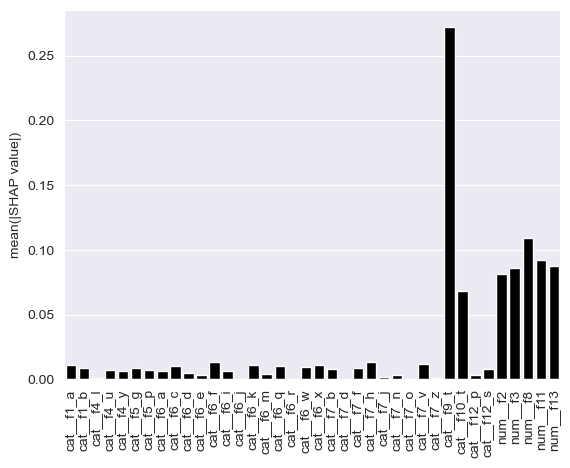

In [52]:
# which features influence a prediction toward class 1
explainer = shap.TreeExplainer(final_model, X_train_df)
shap_values = explainer(X_test_df)
value_mean=np.abs(shap_values[:,:,1]).mean(axis=0)
sns.barplot(y=value,x=feature_names,color="black")
plt.xticks(rotation=90)
plt.ylabel("mean(|SHAP value|)")
plt.show()

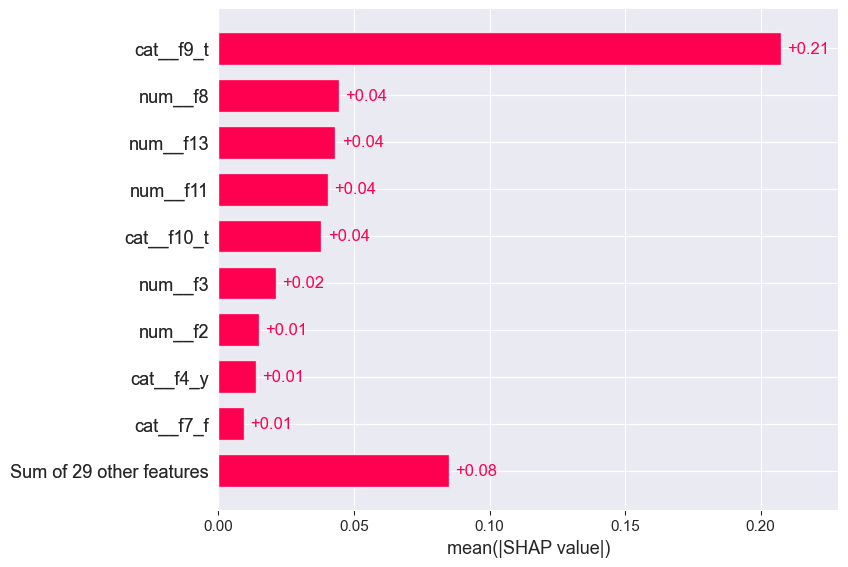

In [53]:
# what features influence the model’s actual behaviour
explainer = shap.TreeExplainer(final_model, X_train_df)
shap_values = explainer(X_test_df)
preds = final_model.predict(X_test_prep)
new_shap_values = []
for i, pred in enumerate(preds):
    new_shap_values.append(shap_values.values[i][:,pred])#
shap_values.values = np.array(new_shap_values)
shap.plots.bar(shap_values)

In [54]:
# principal component analysis & dimension reduction
    # mainly for practice purposes since accor. to literature:
    # tree-based models often perform better without PCA as they handle high-dimensional data well

In [55]:
# inspecting variance visually on the full X dataset 
from sklearn.decomposition import PCA
pca=PCA()
X_full=np.vstack([X_train_prep,X_test_prep])
pca_model=pca.fit(X_full)
variance=pca_model.explained_variance_ratio_.cumsum()

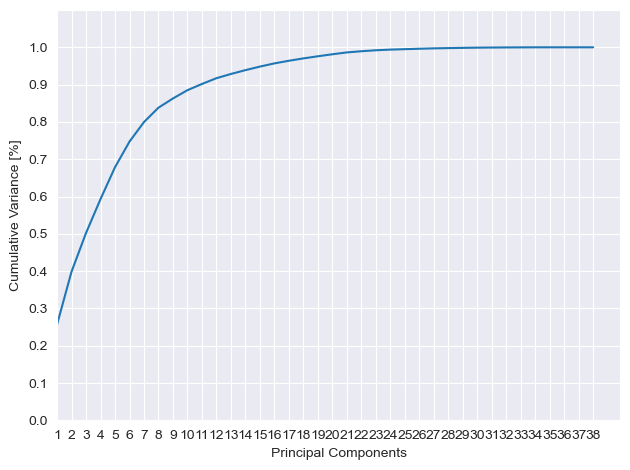

In [56]:
plt.plot(range(1,pca.n_components_+1),variance)
plt.xticks(range(1,pca.n_components_+1))
plt.yticks(np.arange(0.0,1.1,0.1))
plt.xlim(1,)
plt.ylim(0,1.1)
plt.ylabel("Cumulative Variance [%]")
plt.xlabel("Principal Components")
plt.tight_layout()
plt.show()

In [57]:
var_threshold=0.91
print(f"{len(variance[variance<var_threshold])} components cover approx. {variance[variance<var_threshold][-1]*100:.0f}% variance")

11 components cover approx. 90% variance


In [58]:
# re-train with reduced dimensions covering 90% variance
pca_red=PCA(n_components=0.9)
X_train_red=pca_red.fit_transform(X_train_prep)
X_test_red=pca_red.transform(X_test_prep)
final_model_red = RandomForestClassifier(
        max_depth=study.best_params["rf_max_depth"],
        n_estimators=study.best_params["n_estimators"])
final_model_red.fit(X_train_red,y_train_prep)
y_pred_red=final_model_red.predict(X_test_red)
score_red=roc_auc_score(y_test_prep,y_pred_red)
print(f"ROC-AUC score:\nafter dimensionality reduction:\t\t {score_red}\nbefore dimensionality reduction:\t {study.best_value}")

ROC-AUC score:
after dimensionality reduction:		 0.832905982905983
before dimensionality reduction:	 0.9431149097815765
